# Objective

The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## 1. Data preprocessing

In [3]:
airline = pd.read_csv("C:\\Users\\hp\\Desktop\\Clustering.csv")
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airline.drop('ID#',axis=1,inplace=True)
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [9]:
airline.shape

(3999, 11)

In [11]:
round(airline.describe(),3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000,3999.000
mean,73601.328,144.115,2.060,1.015,1.012,17144.846,11.602,460.056,1.374,4118.559,0.370
std,100775.665,773.664,1.377,0.148,0.195,24150.968,9.604,1400.209,3.793,2065.135,0.483
min,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,2.000,0.000
25%,18527.500,0.000,1.000,1.000,1.000,1250.000,3.000,0.000,0.000,2330.000,0.000
50%,43097.000,0.000,1.000,1.000,1.000,7171.000,12.000,0.000,0.000,4096.000,0.000
75%,92404.000,0.000,3.000,1.000,1.000,23800.500,17.000,311.000,1.000,5790.500,1.000
max,1704838.000,11148.000,5.000,3.000,5.000,263685.000,86.000,30817.000,53.000,8296.000,1.000


#### Detect and treat outliers

<Axes: >

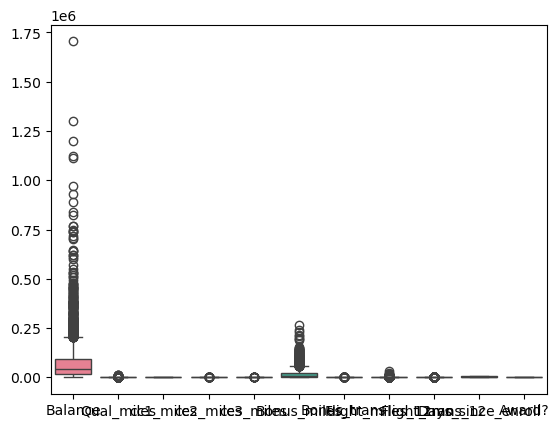

In [13]:
sns.boxplot(airline)

##### Replace outliers

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = airline['Balance'].quantile(0.25)
Q3 = airline['Balance'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
airline['Balance'] = airline['Balance'].clip(lower=lower_bound, upper=upper_bound)

In [17]:
# Calculate Q1, Q3, and IQR
Q1 = airline['Bonus_miles'].quantile(0.25)
Q3 = airline['Bonus_miles'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
airline['Bonus_miles'] = airline['Bonus_miles'].clip(lower=lower_bound, upper=upper_bound)

In [19]:
# Calculate Q1, Q3, and IQR
Q1 = airline['Bonus_trans'].quantile(0.25)
Q3 = airline['Bonus_trans'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
airline['Bonus_trans'] = airline['Bonus_trans'].clip(lower=lower_bound, upper=upper_bound)

In [21]:
# Calculate Q1, Q3, and IQR
Q1 = airline['Flight_miles_12mo'].quantile(0.25)
Q3 = airline['Flight_miles_12mo'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
airline['Flight_miles_12mo'] = airline['Flight_miles_12mo'].clip(lower=lower_bound, upper=upper_bound)

In [23]:
# Calculate Q1, Q3, and IQR
Q1 = airline['Flight_trans_12'].quantile(0.25)
Q3 = airline['Flight_trans_12'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers
airline['Flight_trans_12'] = airline['Flight_trans_12'].clip(lower=lower_bound, upper=upper_bound)

In [25]:
airline.reset_index(drop=True, inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0
2,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0
3,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0
4,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4,200.0,1.0,1403,1
3995,64385.0,0,1,1,1,981.0,5,0.0,0.0,1395,1
3996,73597.0,0,3,1,1,25447.0,8,0.0,0.0,1402,1
3997,54899.0,0,1,1,1,500.0,1,500.0,1.0,1401,0


In [27]:
airline.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000
mean,63768.635784,144.114529,2.059515,1.014504,1.012253,15410.730683,11.470618,178.055639,0.591523,4118.55939,0.370343
std,58673.700736,773.663804,1.376919,0.147650,0.195241,18074.733482,9.115104,294.678028,0.944826,2065.13454,0.482957
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,18527.500000,0.000000,1.000000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2330.00000,0.000000
50%,43097.000000,0.000000,1.000000,1.000000,1.000000,7171.000000,12.000000,0.000000,0.000000,4096.00000,0.000000
75%,92404.000000,0.000000,3.000000,1.000000,1.000000,23800.500000,17.000000,311.000000,1.000000,5790.50000,1.000000
max,203218.750000,11148.000000,5.000000,3.000000,5.000000,57626.250000,38.000000,777.500000,2.500000,8296.00000,1.000000


<Axes: >

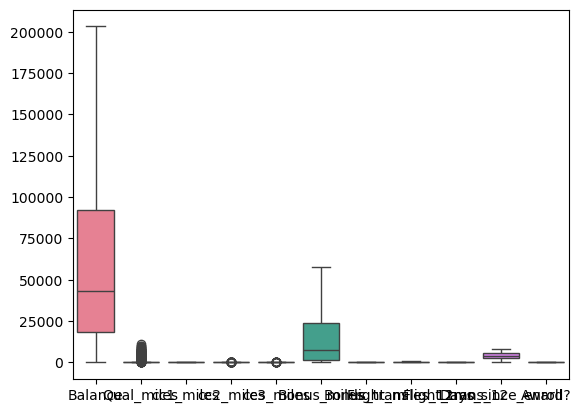

In [29]:
sns.boxplot(airline)

In [31]:
def get_standardized(x):
    return ((x-x.mean())/x.std())

In [33]:
stand_airline = get_standardized(airline)
stand_airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.607182,-0.186275,-0.769482,-0.09823,-0.062759,-0.842985,-1.148711,-0.604238,-0.626065,1.395280,-0.766823
1,-0.758852,-0.186275,-0.769482,-0.09823,-0.062759,-0.840717,-1.039003,-0.604238,-0.626065,1.379784,-0.766823
2,-0.382022,-0.186275,-0.769482,-0.09823,-0.062759,-0.624503,-0.819587,-0.604238,-0.626065,1.411744,-0.766823
3,-0.835002,-0.186275,-0.769482,-0.09823,-0.062759,-0.824949,-1.148711,-0.604238,-0.626065,1.372037,-0.766823
4,0.579192,-0.186275,1.409295,-0.09823,-0.062759,1.542998,1.593990,2.034235,2.019923,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.771941,-0.186275,-0.769482,-0.09823,-0.062759,-0.380959,-0.819587,0.074469,0.432330,-1.314955,1.303755
3995,0.010505,-0.186275,-0.769482,-0.09823,-0.062759,-0.798337,-0.709879,-0.604238,-0.626065,-1.318829,1.303755
3996,0.167509,-0.186275,0.683036,-0.09823,-0.062759,0.555265,-0.380755,-0.604238,-0.626065,-1.315439,1.303755
3997,-0.151169,-0.186275,-0.769482,-0.09823,-0.062759,-0.824949,-1.148711,1.092529,0.432330,-1.315924,-0.766823


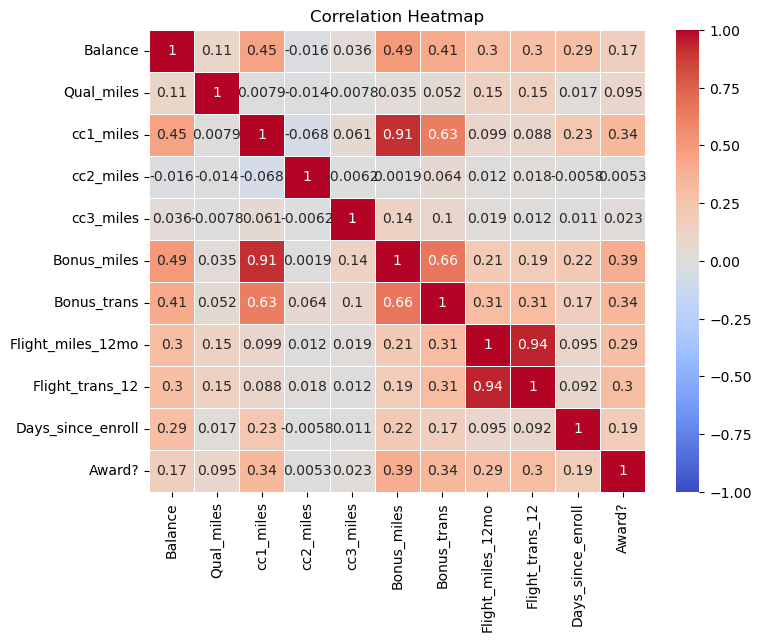

In [35]:
corr = airline.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
sns.pairplot(airline)
plt.show()

## 2. Implementing Clustering Algorithms

### Kmeans

2 [40143.318249907796]
3 [40143.318249907796, 29606.595287359385]
4 [40143.318249907796, 29606.595287359385, 28068.72047704135]
5 [40143.318249907796, 29606.595287359385, 28068.72047704135, 25531.584217383752]
6 [40143.318249907796, 29606.595287359385, 28068.72047704135, 25531.584217383752, 22119.214084923937]
7 [40143.318249907796, 29606.595287359385, 28068.72047704135, 25531.584217383752, 22119.214084923937, 19590.02143514507]
8 [40143.318249907796, 29606.595287359385, 28068.72047704135, 25531.584217383752, 22119.214084923937, 19590.02143514507, 17228.916522242936]


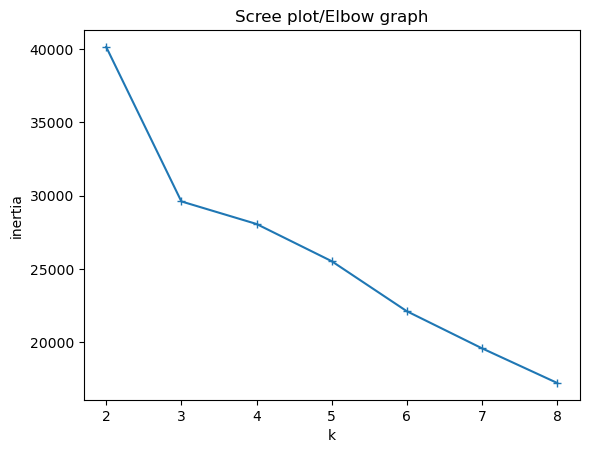

In [40]:
kmeans=KMeans(n_clusters= 3)
kmeans.fit(stand_airline)
kmeans.labels_

kmeans.inertia_

import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,9))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(stand_airline)
    inertia.append(kc.inertia_)
    print(i,inertia)

plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

In [42]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(stand_airline)
labels_3=kmeans.labels_
labels_3

array([0, 0, 0, ..., 2, 0, 0])

In [44]:
from sklearn.metrics import silhouette_score
ss_3=silhouette_score(stand_airline,labels_3)

In [46]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(stand_airline)
labels_6=kmeans.labels_
labels_6

array([1, 1, 1, ..., 3, 1, 1])

In [48]:
from sklearn.metrics import silhouette_score
ss_6=silhouette_score(stand_airline,labels_6)

In [50]:
print(ss_3,ss_6)

0.2807627741041618 0.2643653087131862


In [52]:
#Assign clusters to the data set
airline['clusterid'] = labels_3

In [88]:
pd.Series(labels_3).value_counts()

0    2078
2    1101
1     820
Name: count, dtype: int64

In [54]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0,0
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0,0
2,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0,0
3,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0,0
4,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0,1,1,1,8525.0,4,200.0,1.0,1403,1,0
3995,64385.0,0,1,1,1,981.0,5,0.0,0.0,1395,1,0
3996,73597.0,0,3,1,1,25447.0,8,0.0,0.0,1402,1,2
3997,54899.0,0,1,1,1,500.0,1,500.0,1.0,1401,0,0


In [56]:
airline.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,34526.547040,67.377767,1.162656,1.019731,1.000000,3723.843118,6.228104,35.559192,0.139076,3625.156882,0.161694
1,1,97610.073780,435.764634,2.208537,1.018293,1.008537,20812.326829,16.679268,694.264024,2.238415,4499.286585,0.657317
2,2,93755.085604,71.731153,3.641235,1.001817,1.038147,33445.284287,17.485922,62.539510,0.218892,4766.237965,0.550409


### DBSCAN

In [58]:
from sklearn.cluster import DBSCAN

In [60]:
dbscan = DBSCAN(eps=2, min_samples= 15)
labels=dbscan.fit_predict(stand_airline)

In [62]:
pd.Series(labels).value_counts()

 0    2448
 1    1398
-1     153
Name: count, dtype: int64

In [64]:
silhouette_score(stand_airline,labels)

0.22541644860621105

In [66]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [68]:
airline['cluster']=dbscan.labels_
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid,cluster
0,28143.0,0,1,1,1,174.0,1,0.0,0.0,7000,0,0,0
1,19244.0,0,1,1,1,215.0,2,0.0,0.0,6968,0,0,0
2,41354.0,0,1,1,1,4123.0,4,0.0,0.0,7034,0,0,0
3,14776.0,0,1,1,1,500.0,1,0.0,0.0,6952,0,0,0
4,97752.0,0,4,1,1,43300.0,26,777.5,2.5,6935,1,1,1


In [70]:
airline.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,89461.872549,2516.568627,2.163399,1.379085,1.320261,24520.781046,17.568627,331.764706,1.098039,4059.281046,0.542484,0.915033
1,0,55416.604269,29.008987,1.699755,1.000000,1.000000,9645.387970,8.953023,109.261642,0.364379,3829.039216,0.000000,0.499183
2,1,75581.731581,86.026466,2.678112,1.000000,1.000000,24509.243741,15.211731,281.696710,0.933834,4632.017883,1.000000,1.187411


### Agglomerative clustering

### For a large dataset hierachical clustering not gives us a significant clusters.

In [72]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [74]:
dm=sch.linkage(stand_airline, metric='euclidean',method='complete')

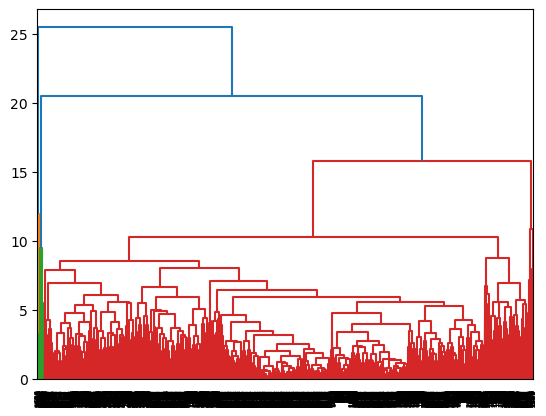

In [76]:
dendrogram = sch.dendrogram(dm)
plt.show()

In [78]:
hc = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage = 'complete')
hc.fit(stand_airline)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [90]:
hc.labels_
pd.Series(hc.labels_).value_counts()

0    3941
2      43
1      15
Name: count, dtype: int64

In [82]:
airline['h_clusterid'] = hc.labels_

In [84]:
airline.groupby(['h_clusterid']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid,cluster
h_clusterid,,,,,,,,,,,,,
0,63715.134611,145.681807,2.064197,1.000000,1.000761,15269.121479,11.347628,177.259325,0.588683,4118.306775,0.369449,0.756153,0.330627
1,102441.716667,78.800000,3.466667,1.000000,4.066667,55485.600000,27.533333,298.833333,0.866667,4613.866667,0.533333,1.800000,-1.000000
2,55181.470930,23.255814,1.139535,2.348837,1.000000,14409.773256,17.139535,208.906977,0.755814,3968.930233,0.395349,0.348837,-1.000000


#### KMeans gives us an appropriate cluster if we look at the silhouette score between KMeans and DBSCAN. 

## 3. Cluster Analysis and Interpretation

If we look into the clusters of 3 different clustering algorithms then we can say that Hierarchical clustering does not give us an appropriate cluster it divides the data into 3 categories the first category almost have all the data points and if we look into the dendrogram then it's very complicated because of the size of data. Then, between DBSCAN and KMeans we can say that KMeans gives a much better cluster than DBSCAN in both the ways like a higher silhouette score and distribution of clusters is almost good.

## 4. Visualization 

In [94]:
from sklearn.decomposition import PCA
pca=PCA()
pca_components=pca.fit_transform(stand_airline)

In [96]:
pca_components

array([[-1.75010271e+00, -1.90462202e-01, -6.52971481e-01, ...,
        -3.05539578e-01,  5.01216215e-02, -7.05538812e-03],
       [-1.75977542e+00, -1.97255850e-01, -6.05031373e-01, ...,
        -2.46460251e-01,  5.68890064e-02, -6.68801071e-03],
       [-1.43247663e+00, -3.12977813e-01, -6.25635959e-01, ...,
        -9.21069079e-02,  2.00328849e-01, -2.95472981e-04],
       ...,
       [ 1.69827831e-01, -9.47426314e-01,  2.04216266e-01, ...,
        -3.98747634e-01, -1.01971193e-01, -2.71398577e-02],
       [-1.25030720e+00,  1.63617550e+00,  2.82167705e-01, ...,
        -5.81036048e-01, -8.49010024e-02, -4.69178331e-01],
       [-2.47358568e+00,  1.00250408e-01,  2.46958371e-01, ...,
        -4.31795534e-01, -1.08762269e-02, -1.39311354e-02]])

In [98]:
pca = PCA(n_components = 11)
pca_values = pca.fit_transform(stand_airline)

In [100]:
var = pca.explained_variance_ratio_
var

array([0.31787608, 0.15868439, 0.09360391, 0.09125153, 0.08616929,
       0.08383077, 0.07493787, 0.04687698, 0.03487583, 0.00671383,
       0.00517951])

In [102]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 31.79,  47.66,  57.02,  66.15,  74.77,  83.15,  90.64,  95.33,
        98.82,  99.49, 100.01])

In [104]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), airline[['clusterid']]], axis = 1)
finalDf

,pc1,pc2,clusterid
0,-1.750103,-0.190462,0
1,-1.759775,-0.197256,0
2,-1.432477,-0.312978,0
3,-1.826609,-0.183586,0
4,4.034287,1.009929,1
...,...,...,...
3994,-0.829798,1.010840,0
3995,-1.234625,0.080180,0
3996,0.169828,-0.947426,2
3997,-1.250307,1.636175,0


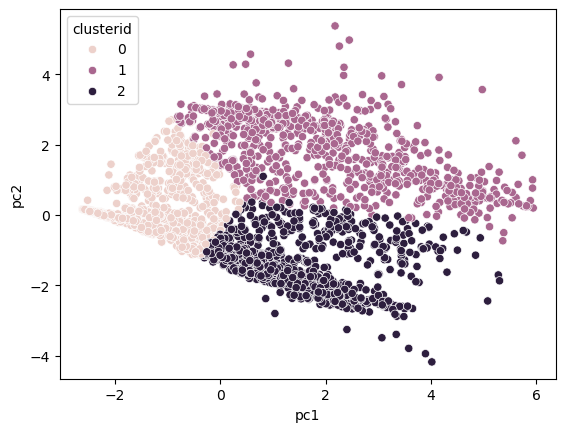

In [106]:
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='clusterid')
plt.show()

## 5. Evaluation and Performance Metrics

Silhouette score is a performance metric that shows us how perfect our clusters are. It lies from -1 to +1 if it's in positive side then clustering is good and if in negative side then there is a misclassification in the clustering analysis.

In our case the highest silhouette score for KMeans is 0.280 and that for DBSCAN is 0.225, so that we can say that KMeans gives us an more accurate cluster than DBSCAN.